In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
train=pd.read_csv(r'G:\Edvancer\Python module\Project\project2\carvan_train.csv')
test=df=pd.read_csv(r'G:\Edvancer\Python module\Project\project2\carvan_test.csv')

In [33]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


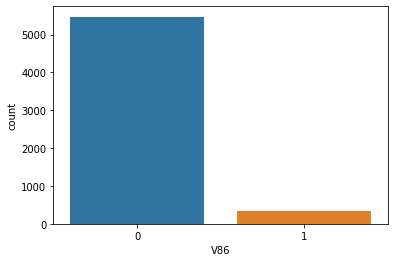

In [3]:
sns.countplot(train['V86']) 

In [4]:
train['V86'].value_counts()

0    5474
1     348
Name: V86, dtype: int64

### We have a imbalanced dataset

In [ ]:
# For imbalanced dataset we have a couple of techniques like Resampling(oversampling or undersampling),SMOTE or 
# we can use BalancedBaggingClassifier.
# Lets use all resampling and check what is the result.
# Lets start by preprocessing and cleaning of data

In [5]:
train.isnull().sum()  #no null values

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
      ..
V57    0
V58    0
V59    0
V60    0
V61    0
V62    0
V63    0
V64    0
V65    0
V66    0
V67    0
V68    0
V69    0
V70    0
V71    0
V72    0
V73    0
V74    0
V75    0
V76    0
V77    0
V78    0
V79    0
V80    0
V81    0
V82    0
V83    0
V84    0
V85    0
V86    0
Length: 86, dtype: int64

In [ ]:
# V44,V1,V4,V5,V6 are categorical columns as per the data dictionary

In [ ]:
# Split into train and test data

In [6]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(train,test_size=0.3,random_state=1)

In [7]:
dummycol=['V1','V4','V5','V6','V44']
for i in dummycol:
    dummy=pd.get_dummies(df_train[i],prefix=i)
    df_train=pd.concat([df_train,dummy],axis=1)
    del df_train[i]
del dummy

In [8]:
dummycol=['V1','V4','V5','V6','V44']
for i in dummycol:
    dummy=pd.get_dummies(df_test[i],prefix=i)
    df_test=pd.concat([df_test,dummy],axis=1)
    del df_test[i]
del dummy

In [9]:
print(df_train.shape,"||",df_test.shape) # two columns are not present. lets see who and why

(4075, 151) || (1747, 149)


In [10]:
df_train.columns.difference(df_test.columns).tolist()

['V6_8', 'V6_9']

In [11]:
train['V6'].value_counts() #the value counts of 9 and 8 is very less so we can drop them

0    3228
1    1599
2     733
3     152
4      66
5      18
6      13
7       6
9       4
8       3
Name: V6, dtype: int64

In [12]:
df_train.drop(['V6_8', 'V6_9'],inplace=True,axis=1)

In [13]:
print(df_train.shape,"||",df_test.shape)

(4075, 149) || (1747, 149)


# Resampling and finding the result

In [14]:
df_train['V86'].value_counts()

0    3832
1     243
Name: V86, dtype: int64

In [15]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['V86']==0)] 
df_minority = df_train[(df_train['V86']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 3832, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [16]:
df_upsampled['V86'].value_counts() # value with 1 is upsampled

1    3832
0    3832
Name: V86, dtype: int64

In [17]:
# the logic here is that we need to train on the resampled data but the testing should be done on un-resampled data
# to know the actual result
x_train=df_upsampled.drop('V86',axis=1)
y_train=df_upsampled['V86']
x_test=df_test.drop('V86',axis=1)
y_test=df_test['V86']

In [18]:
x_train.shape

(7664, 148)

# Modeling

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import svm

In [20]:
from sklearn.metrics import fbeta_score

### Logistic Regression

In [21]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(class_weight='balanced')

In [22]:
predict_lr=lr.predict(x_test)

fbeta_score(y_test, predict_lr, beta=2)
#the score is > 0.26 (given score)

0.33943965517241376

### Decision Tree

In [23]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
predict_dt=dt.predict(x_test)

fbeta_score(y_test, predict_dt, beta=2)
# the score is < 0.26 (given score)

0.12773722627737227

### Random Forest

In [25]:
rf=RandomForestClassifier(class_weight='balanced')

rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [26]:
predict_rf=rf.predict(x_test)

fbeta_score(y_test, predict_rf, beta=2)
# the score is < 0.26 (given score)

0.05263157894736842

## XGB Classifier

In [27]:
xbg=XGBClassifier()
xbg.fit(x_train,y_train)

XGBClassifier()

In [28]:
predict_xbg=xbg.predict(x_test)

fbeta_score(y_test, predict_xbg, beta=2) 

# the score is > 0.26 (given score)

0.37220843672456577

In [43]:
predict_xbg[:20]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
      dtype=int64)

### SVM

In [29]:
svmc = svm.SVC()
svmc.fit(x_train, y_train)

SVC()

In [30]:
predict_svm=svmc.predict(x_test)
fbeta_score(y_test, predict_svm, beta=2)
# the score is > 0.26 (given score)

0.33752860411899316

## Moving the threshold value

In [34]:
train_score=xbg.predict_proba(x_train)[:,1]

real=y_train

cutoffs=np.linspace(0.001,0.999,999)

In [35]:
fbetas=[]
for cutoff in cutoffs:
    
    predicted=(train_score>cutoff).astype(int)
    
    fbetas.append(fbeta_score(y_train,predicted,beta=2))

In [36]:
my_cutoff=cutoffs[fbetas==max(fbetas)]

In [37]:
predictions=(xbg.predict_proba(x_test)[:,1]>my_cutoff).astype(int)

In [38]:
pd.Series(predictions).value_counts()

0    1107
1     640
dtype: int64

In [40]:
fbeta_score(y_test, predictions, beta=2)

0.3537735849056603

In [ ]:
# before thresholding moving prediction was = [ 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]

In [44]:
predictions[:20]

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
# we can clearly by moving threshold there are more number of 1's in the predicted list which means that
# if the value = (suppose) 0.3 then any value > 0.3 will be 1 and any value < 0.3 will be 0 

## The best performing model using Resampling is XGB with score 0.37